In [12]:
import pandas as pd
import numpy as np
import pymc as pm
from src.data_utils import load_and_process_data
from src.model import run_full_analysis
import matplotlib.pyplot as plt

league = 'Premier_League'
season = '2021-2022'


# Simple one-liner to get everything ready
df, team_mapping, n_teams = load_and_process_data(
    db_path=r'C:\Users\Owner\dev\algobetting\infra\data\db\fotmob.db',
    league=league, 
    season=season,
    max_goals=9,
    decay_rate=0.002,
    goals_weight=0.2,
    xg_weight=0.5,
    psxg_weight=0.3

)

df

,match_id,match_date,home_team,away_team,home_goals,away_goals,weight,days_ago,is_actual,poisson_binomial_xg_prob,poisson_binomial_psxg_prob,poisson_xg_total_prob,home_idx,away_idx
0,3609929,2021-08-13,Brentford,Arsenal,0,0,0.030809,281,False,0.061463,0,0.081066,2,0
1,3609929,2021-08-13,Brentford,Arsenal,0,1,0.039431,281,False,0.086842,0,0.103754,2,0
2,3609929,2021-08-13,Brentford,Arsenal,0,2,0.025233,281,False,0.056614,0,0.066396,2,0
3,3609929,2021-08-13,Brentford,Arsenal,0,3,0.010765,281,False,0.022722,0,0.028326,2,0
4,3609929,2021-08-13,Brentford,Arsenal,0,4,0.003444,281,False,0.006314,0,0.009063,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10608,3610309,2022-05-22,Norwich,Tottenham,2,8,0.001094,0,False,0.000483,0,0.001641,14,16
10609,3610309,2022-05-22,Norwich,Tottenham,3,2,0.001072,0,False,0.000856,0,0.001607,14,16
10610,3610309,2022-05-22,Norwich,Tottenham,3,3,0.001365,0,False,0.001490,0,0.002048,14,16
10611,3610309,2022-05-22,Norwich,Tottenham,3,4,0.001305,0,False,0.001589,0,0.001957,14,16


FOOTBALL MODEL ANALYSIS - PREMIER_LEAGUE 2021
Season: 2021
League: Premier_League
Teams: 20
Model version: vanilla_priors
Samples: 5000 (tune: 2500)

Building and sampling model...
  → Previous season priors disabled
  → Using default priors (no previous season data)


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymc\data.py:274: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Analyzing results...
MODEL ANALYSIS RESULTS

1. PARAMETER SUMMARY STATISTICS
----------------------------------------
                 mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
att_str_raw[0]  0.263  0.279  -0.261    0.795      0.019    0.013     222.0   
att_str_raw[1] -0.040  0.286  -0.591    0.472      0.019    0.014     224.0   
att_str_raw[2] -0.022  0.290  -0.540    0.540      0.019    0.013     238.0   
att_str_raw[3] -0.083  0.291  -0.638    0.447      0.019    0.014     229.0   
att_str_raw[4] -0.215  0.289  -0.746    0.322      0.019    0.013     244.0   
...               ...    ...     ...      ...        ...      ...       ...   
def_str[15]     0.233  0.140  -0.027    0.498      0.002    0.001    7992.0   
def_str[16]    -0.178  0.175  -0.513    0.138      0.002    0.002    5142.0   
def_str[17]     0.329  0.132   0.092    0.592      0.001    0.001    8268.0   
def_str[18]     0.050  0.153  -0.234    0.340      0.002    0.002    6457.0   
def_str[19] 

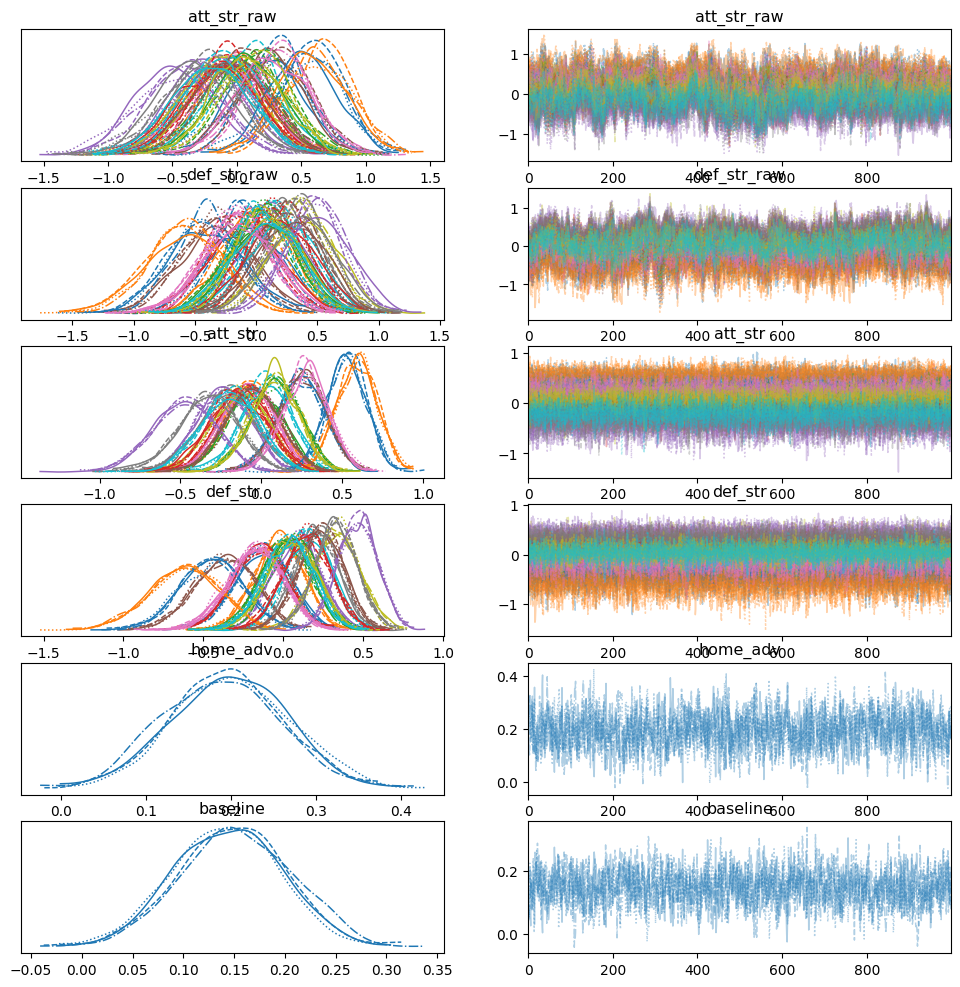

In [13]:
model, trace, results = run_full_analysis(
    train_df=df,
    teams=team_mapping,
    n_teams=n_teams,
    season=int(season[:4]),
    league=league,
    team_mapping=team_mapping,
    model_version="vanilla_priors",
    trace_samples=5000,
    tune_samples=2500,
    use_previous_season_priors=False
)